# Q1. Business Case: Target SQL  | |   Submission:31 Aug 2022
#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


**Mindset**:

Evaluation will be kept lenient, so make sure you attempt this case study.

It is understandable that you might struggle with getting started on this. Just brainstorm, discuss with peers, or get help from TAs.

Try to attempt this before it is discussed in the Live Case Discussion with the Instructor.

There is no right or wrong answer. We have to become comfortable dealing with uncertainty in business. This is exactly the skill we want to develop.

**Context**

Target is one of the world’s most recognized brands and one of America’s leading retailers. Target makes itself a preferred shopping destination by offering outstanding value, inspiration, innovation and an exceptional guest experience that no other retailer can deliver.

This business case has information of 100k orders from 2016 to 2018 made at Target in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers.

Dataset: https://drive.google.com/drive/folders/1TGEc66YKbD443nslRi1bWgVd238gJCnb

**Data is available in 8 csv files:**

***1. customers.csv***

***2. geolocation.csv***

***3. order_items.csv***

***4. payments.csv***

***5. reviews.csv***

***6. orders.csv***

***7. products.csv***

***8. sellers.csv***

Each feature or columns of different CSV files are described below:

The customers.csv contain following features:

Features

Description

customer_id

Id of the consumer who made the purchase.

customer_unique_id

Unique Id of the consumer.

customer_zip_code_prefix

Zip Code of the location of the consumer.

customer_city

Name of the City from where order is made.

customer_state

State Code from where order is made(Ex- sao paulo-SP).

The sellers.csv contains following features:

Features

Description

seller_id

Unique Id of the seller registered

seller_zip_code_prefix

Zip Code of the location of the seller.

seller_city

Name of the City of the seller.

seller_state

State Code (Ex- sao paulo-SP)

The order_items.csv contain following features:

Features

Description

order_id

A unique id of order made by the consumers.

order_item_id

A Unique id given to each item ordered in the order.

product_id

A unique id given to each product available on the site.

seller_id

Unique Id of the seller registered in Target.

shipping_limit_date

The date before which shipping of the ordered product must be completed.

price

Actual price of the products ordered .

freight_value

Price rate at which a product is delivered from one point to another.

Features

Description

geolocation_zip_code_prefix

first 5 digits of zip code

geolocation_lat

latitude

geolocation_lng

longitude

geolocation_city

city name

geolocation_state

state

The payments.csv contain following features:

Features

Description

order_id

A unique id of order made by the consumers.

payment_sequential

sequences of the payments made in case of EMI.

payment_type

mode of payment used.(Ex-Credit Card)

payment_installments

number of installments in case of EMI purchase.

payment_value

Total amount paid for the purchase order.

The orders.csv contain following features:

Features

Description

order_id

A unique id of order made by the consumers.

customer_id

Id of the consumer who made the purchase.

order_status

status of the order made i.e delivered, shipped etc.

order_purchase_timestamp

Timestamp of the purchase.

order_delivered_carrier_date

delivery date at which carrier made the delivery.

order_delivered_customer_date

date at which customer got the product.

order_estimated_delivery_date

estimated delivery date of the products.

The reviews.csv contain following features:

Features

Description

review_id

Id of the review given on the product ordered by the order id.

order_id

A unique id of order made by the consumers.

review_score

review score given by the customer for each order on the scale of 1–5.

review_comment_title

Title of the review

review_comment_message

Review comments posted by the consumer for each order.

review_creation_date

Timestamp of the review when it is created.

review_answer_timestamp

Timestamp of the review answered.

The products.csv contain following features:

Features

Description

product_id

A unique identifier for the proposed project.

product_category_name

Name of the product category

product_name_lenght

length of the string which specifies the name given to the products ordered.

product_description_lenght

length of the description written for each product ordered on the site.

product_photos_qty

Number of photos of each product ordered available on the shopping portal.

product_weight_g

Weight of the products ordered in grams.

product_length_cm

Length of the products ordered in centimeters.

product_height_cm

Height of the products ordered in centimeters.

product_width_cm

width of the product ordered in centimeters.

High level overview of relationship between datasets:



### Assume you are a data scientist at Target, and are given this data to analyze and provide some insights and recommendations from it.

What ‘good’ looks like?

Import the dataset and do usual exploratory analysis steps like checking the structure & characteristics of the dataset

Data type of columns in a table

Time period for which the data is given

Cities and States covered in the dataset

In-depth Exploration:

Is there a growing trend on e-commerce in Brazil? How can we describe a complete scenario? Can we see some seasonality with peaks at specific months?

What time do Brazilian customers tend to buy (Dawn, Morning, Afternoon or Night)?

Evolution of E-commerce orders in the Brazil region:

Get month on month orders by region, states

How are customers distributed in Brazil

Impact on Economy: Analyze the money movemented by e-commerce by looking at order prices, freight and others.

Get % increase in cost of orders from 2017 to 2018 (include months between Jan to Aug only)

Mean & Sum of price and freight value by customer state

Analysis on sales, freight and delivery time

Calculate days between purchasing, delivering and estimated delivery

Create columns:

time_to_delivery = order_purchase_timestamp-order_delivered_customer_date

diff_estimated_delivery = order_estimated_delivery_date-order_delivered_customer_date

Group data by state, take mean of freight_value, time_to_delivery, diff_estimated_delivery

Sort the data to get the following:

Top 5 states with highest/lowest average freight value - sort in desc/asc limit 5

Top 5 states with highest/lowest average time to delivery

Top 5 states where delivery is really fast/ not so fast compared to estimated date

Payment type analysis:

Month over Month count of orders for different payment types

Distribution of payment installments and count of orders

**Evaluation Criteria (80 points)**

Initial exploration of dataset like checking the characteristics of data (10 points)

In-depth Exploration (10 points)

Evolution of E-commerce orders in the Brazil region (10 points)

Impact on Economy (10 points)

Analysis on sales, freight and delivery time (10 points)

Payment type analysis (10 points)

Actionable Insights (10 points)

Recommendations (10 points)

Submission Process:

Type your insights and recommendations in the text editor
Convert your solutions notebook into PDF, upload it on the dashboard

Optionally, you may add images/graphs in the text editor by taking screenshots

After submitting, you will not be allowed to edit your submission

In [38]:
# !pip3 install google-cloud
# !pip3 install google-cloud-bigquery[pandas]
# !pip3 install google-cloud-storage
# !pip3 install --upgrade google-cloud-bigquery[bqstorage,pandas]

In [39]:
#Imports google cloud client library and initiates BQ service
from google.cloud import bigquery
import seaborn as sns
import numpy as np
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame


In [40]:
import matplotlib.pyplot as plt

In [41]:
%load_ext google.cloud.bigquery

The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


In [42]:
#Set environment variables for your notebook
import os 
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = "C:\\Users\\user\\Desktop\\SQL\\subtle-odyssey-350321-e134859c42e5.json"

bigquery_client = bigquery.Client()

In [43]:
#Write Query on BQ
QUERY = """

select * from `target.customers` limit 15;



  """
#Run the query and write result to a pandas data frame
Query_Results = bigquery_client.query(QUERY)
df = Query_Results.to_dataframe()
#View top few rows of result
df

customer_id                customer_unique_id  \
0   0735e7e4298a2ebbb46649346570476a  fcb003b1bdc0df64b4d065d9bb94f8c4   
1   903b3d86e3990db01619a4ebe3edef4e  46824822b15da44e983b021d0e945379   
2   38c97666e962d4fea7fd6a83e69f20cd  b6108acc674ae5c99e29adc1047d1049   
3   77c2f46cf580f4874c9a5751c2d88474  402cce5c0509000eed9e77fece8056e2   
4   4d3ef4cfffb8ad4767c199c36a4cfee6  6ba00666ab7eada5ceec279b259e44b5   
5   3000841b86e1fbe9493b523245d5c68d  796a0b1a21f597704057184a16ab4d71   
6   3c325415ccc7e622c66dec4bc9120030  05d1d2d9f0161c5f397ce7fc770910d4   
7   04f3a7b250e3be964f01bf22bccdc602  c34585a0276ecc5e4fb03de755e8f7d0   
8   894202b8ef01f4719a4691e79dd24c17  01a4fe5fc00bbdb0b0a4af5a5345cca5   
9   9d715b9fb75a9d081c14126c09218b96  8f399f3b7ace8e6245422c9e1fdbf4b6   
10  018184ac5f52a821bb00f3ef21d75799  54fc4ff419d5e05db5fe42906bc3da98   
11  1b079952d7f8ea0edc2babd69178160b  587482ee4b3da3583df4057f55e1c818   
12  8c8ebb03344906d2201f54daafd859cf  cb91b5b25e1e383e3b16135d40fef818   
13  040cc0201a8b98d2c1ed270d6b52d561  561ccc48c5f03fb5cc10bdf7a0006ffa   
14  8611feeeaa6d278ec4b4a5e4ae947fca  f8217efb7935db087c5619c813e9c293   

    customer_zip_code_prefix customer_city customer_state  
0                      59650           acu             RN  
1                      59650           acu             RN  
2                      59650           acu             RN  
3                      63430           ico             CE  
4                      63430           ico             CE  
5                      63430           ico             CE  
6                      63430           ico             CE  
7                      63430           ico             CE  
8                      63430           ico             CE  
9                      63430           ico             CE  
10                     63430           ico             CE  
11                     95240           ipe             RS  
12                     95240           ipe             RS  
13                     62250           ipu             CE  
14                     62250           ipu             CE

In [44]:
%%bigquery
select *

from target.customers limit 3
;

Downloading: 100%|██████████| 3/3 [00:02<00:00,  1.27rows/s]


customer_id                customer_unique_id  \
0  0735e7e4298a2ebbb46649346570476a  fcb003b1bdc0df64b4d065d9bb94f8c4   
1  903b3d86e3990db01619a4ebe3edef4e  46824822b15da44e983b021d0e945379   
2  38c97666e962d4fea7fd6a83e69f20cd  b6108acc674ae5c99e29adc1047d1049   

   customer_zip_code_prefix customer_city customer_state  
0                     59650           acu             RN  
1                     59650           acu             RN  
2                     59650           acu             RN

In [45]:
%%bigquery
select *

from target.order_items limit 3
;

Downloading: 100%|██████████| 3/3 [00:02<00:00,  1.31rows/s]


order_id  order_item_id  \
0  f09e36e258656850b92657ac5f67b6d5              1   
1  f9ccaff7267fd0cf076e795b1fae8b69              1   
2  c79bdf061e22288609201ec60deb42fb              1   

                         product_id                         seller_id  \
0  44d53f1240d6332232e4393c06500475  b64d51f0435e884e8de603b1655155ae   
1  44d53f1240d6332232e4393c06500475  b64d51f0435e884e8de603b1655155ae   
2  5304ff3fa35856a156e1170a6022d34d  cf6f6bc4df3999b9c6440f124fb2f687   

        shipping_limit_date  price  freight_value  
0 2018-07-09 13:31:36+00:00    3.0          12.79  
1 2018-08-14 14:04:44+00:00    3.0          15.23  
2 2017-05-12 19:05:20+00:00    3.5           8.72

In [46]:
%%bigquery
select *

from target.orders limit 3
;

Downloading: 100%|██████████| 3/3 [00:02<00:00,  1.23rows/s]


order_id                       customer_id  \
0  7a4df5d8cff4090e541401a20a22bb80  725e9c75605414b21fd8c8d5a1c2f1d6   
1  35de4050331c6c644cddc86f4f2d0d64  4ee64f4bfc542546f422da0aeb462853   
2  b5359909123fa03c50bdb0cfed07f098  438449d4af8980d107bf04571413a8e7   

  order_status  order_purchase_timestamp order_approved_at  \
0      created 2017-11-25 11:10:33+00:00               NaT   
1      created 2017-12-05 01:07:58+00:00               NaT   
2      created 2017-12-05 01:07:52+00:00               NaT   

  order_delivered_carrier_date order_delivered_customer_date  \
0                          NaT                           NaT   
1                          NaT                           NaT   
2                          NaT                           NaT   

  order_estimated_delivery_date  
0     2017-12-12 00:00:00+00:00  
1     2018-01-08 00:00:00+00:00  
2     2018-01-11 00:00:00+00:00

In [47]:
%%bigquery
select *

from target.order_reviews limit 3
;

Downloading: 100%|██████████| 3/3 [00:02<00:00,  1.31rows/s]


review_id                          order_id  \
0  be7e2989673cb2a147b87ba73277da9e  777c67eab7c0712ccde8ffbb22715adb   
1  e12151267e4594d69eda14a871e2a1ab  4338a4463f7f9193d2a03a83a4b68ba0   
2  41d614b133efebcd10352001bc024071  b8aaeda740b17cf925d3f2a13dcd1d7f   

   review_score review_comment_title       review_creation_date  \
0             1                 None  0001-04-17 00:00:00+00:00   
1             1                 None  0001-04-17 00:00:00+00:00   
2             1                 None  0001-04-17 00:00:00+00:00   

     review_answer_timestamp  
0  0001-04-17 07:40:00+00:00  
1  0001-04-17 09:04:00+00:00  
2  0002-04-17 03:48:00+00:00

In [48]:
%%bigquery
select *

from target.payments limit 3
;

Downloading: 100%|██████████| 3/3 [00:02<00:00,  1.34rows/s]


order_id  payment_sequential payment_type  \
0  1a57108394169c0b47d8f876acc9ba2d                   2  credit_card   
1  744bade1fcf9ff3f31d860ace076d422                   2  credit_card   
2  8bcbe01d44d147f901cd3192671144db                   4      voucher   

   payment_installments  payment_value  
0                     0         129.94  
1                     0          58.69  
2                     1           0.00

In [49]:
%%bigquery
select *

from target.products limit 3
;

Downloading: 100%|██████████| 3/3 [00:02<00:00,  1.25rows/s]


product_id product_category  product_name_length  \
0  5eb564652db742ff8f28759cd8d2652a             None                 <NA>   
1  09ff539a621711667c43eba6a3bd8466           babies                   60   
2  2f763ba79d9cd987b2034aac7ceffe06      electronics                   45   

   product_description_length  product_photos_qty  product_weight_g  \
0                        <NA>                <NA>              <NA>   
1                         865                   3              <NA>   
2                        1198                   2               595   

   product_length_cm  product_height_cm  product_width_cm  
0               <NA>               <NA>              <NA>  
1               <NA>               <NA>              <NA>  
2                  8                  6                 6

In [50]:
%%bigquery
select *

from target.sellers limit 3
;

Downloading: 100%|██████████| 3/3 [00:02<00:00,  1.29rows/s]


seller_id  seller_zip_code_prefix seller_city  \
0  4be2e7f96b4fd749d52dff41f80e39dd                   69900  rio branco   
1  327b89b872c14d1c0be7235ef4871685                   69005      manaus   
2  4221a7df464f1fe2955934e30ff3a5a1                   48602       bahia   

  seller_state  
0           AC  
1           AM  
2           BA

----------------------------------------------------------------------------------------------------------------------------------------

## **Project Starts Here**

----------------------------------------------------------------------------------------------------------------------------------------

### Assume you are a data scientist at Target, and are given this data to analyze and provide some insights and recommendations from it.

What ‘good’ looks like?

**Import the dataset and do usual exploratory analysis steps like checking the structure & characteristics of the dataset**

Data type of columns in a table                             

Time period for which the data is given

Cities and States covered in the dataset                      

**In-depth Exploration:**

Is there a growing trend on e-commerce in Brazil? How can we describe a complete scenario? Can we see some seasonality with peaks at specific months?  

What time do Brazilian customers tend to buy (Dawn, Morning, Afternoon or Night)?          

**Evolution of E-commerce orders in the Brazil region:**

Get month on month orders by region, states           

How are customers distributed in Brazil           

**Impact on Economy: Analyze the money movemented by e-commerce by looking at order prices, freight and others.**    

Get % increase in cost of orders from 2017 to 2018 (include months between Jan to Aug only)    

Mean & Sum of price and freight value by customer state

**Analysis on sales, freight and delivery time**

Calculate days between purchasing, delivering and estimated delivery

**Create columns:**

time_to_delivery = order_purchase_timestamp-order_delivered_customer_date

diff_estimated_delivery = order_estimated_delivery_date-order_delivered_customer_date

Group data by state, take mean of freight_value, time_to_delivery, diff_estimated_delivery

**Sort the data to get the following:**

Top 5 states with highest/lowest average freight value - sort in desc/asc limit 5

Top 5 states with highest/lowest average time to delivery

Top 5 states where delivery is really fast/ not so fast compared to estimated date

**Payment type analysis:**

Month over Month count of orders for different payment types

Distribution of payment installments and count of orders


In [165]:
Q1 = 'Data type of columns in a table '                            
Q2 = 'Time period for which the data is given'
Q3 = 'Cities and States covered in the dataset'
Q4 = 'Is there a growing trend on e-commerce in Brazil? How can we describe a complete scenario? Can we see some seasonality with peaks at specific months?'  
Q5 = 'What time do Brazilian customers tend to buy (Dawn, Morning, Afternoon or Night)?'
Q6 = 'Get month on month orders by region, states'           
Q7 = 'How are customers distributed in Brazil '          
Q8 = 'Get % increase in cost of orders from 2017 to 2018 (include months between Jan to Aug only)'    
Q9 = 'Mean & Sum of price and freight value by customer state'
Q10 = 'Calculate days between purchasing, delivering and estimated delivery'
Q11 = 'time_to_delivery = order_purchase_timestamp-order_delivered_customer_date'
Q12 = 'diff_estimated_delivery = order_estimated_delivery_date-order_delivered_customer_date'
Q13 = 'Group data by state, take mean of freight_value, time_to_delivery, diff_estimated_delivery'
Q14 = 'Top 5 states with highest/lowest average freight value - sort in desc/asc limit 5'
Q15 = 'Top 5 states with highest/lowest average time to delivery'
Q16 = 'Top 5 states where delivery is really fast/ not so fast compared to estimated date'
Q17 = 'Month over Month count of orders for different payment types'
Q18 = 'Distribution of payment installments and count of orders'

### Q1) Data type of columns in a table.

In [249]:
bigquery_client.query("""
select x.* from 
(SELECT
    * EXCEPT(is_generated, generation_expression, is_stored, is_updatable,is_hidden
    ,is_system_defined,is_partitioning_column,
    clustering_ordinal_position,collation_name,column_default,ordinal_position,table_catalog)
  FROM
    subtle-odyssey-350321.target.INFORMATION_SCHEMA.COLUMNS) as x
""").to_dataframe()

table_schema     table_name                    column_name is_nullable  \
0        target    order_items                       order_id         YES   
1        target    order_items                  order_item_id         YES   
2        target    order_items                     product_id         YES   
3        target    order_items                      seller_id         YES   
4        target    order_items            shipping_limit_date         YES   
5        target    order_items                          price         YES   
6        target    order_items                  freight_value         YES   
7        target        sellers                      seller_id         YES   
8        target        sellers         seller_zip_code_prefix         YES   
9        target        sellers                    seller_city         YES   
10       target        sellers                   seller_state         YES   
11       target    geolocation    geolocation_zip_code_prefix         YES   
12       target    geolocation                geolocation_lat         YES   
13       target    geolocation                geolocation_lng         YES   
14       target    geolocation               geolocation_city         YES   
15       target    geolocation              geolocation_state         YES   
16       target       products                     product_id         YES   
17       target       products               product_category         YES   
18       target       products            product_name_length         YES   
19       target       products     product_description_length         YES   
20       target       products             product_photos_qty         YES   
21       target       products               product_weight_g         YES   
22       target       products              product_length_cm         YES   
23       target       products              product_height_cm         YES   
24       target       products               product_width_cm         YES   
25       target         orders                       order_id         YES   
26       target         orders                    customer_id         YES   
27       target         orders                   order_status         YES   
28       target         orders       order_purchase_timestamp         YES   
29       target         orders              order_approved_at         YES   
30       target         orders   order_delivered_carrier_date         YES   
31       target         orders  order_delivered_customer_date         YES   
32       target         orders  order_estimated_delivery_date         YES   
33       target       payments                       order_id         YES   
34       target       payments             payment_sequential         YES   
35       target       payments                   payment_type         YES   
36       target       payments           payment_installments         YES   
37       target       payments                  payment_value         YES   
38       target      customers                    customer_id         YES   
39       target      customers             customer_unique_id         YES   
40       target      customers       customer_zip_code_prefix         YES   
41       target      customers                  customer_city         YES   
42       target      customers                 customer_state         YES   
43       target  order_reviews                      review_id         YES   
44       target  order_reviews                       order_id         YES   
45       target  order_reviews                   review_score         YES   
46       target  order_reviews           review_comment_title         YES   
47       target  order_reviews           review_creation_date         YES   
48       target  order_reviews        review_answer_timestamp         YES   

    data_type  
0      STRING  
1       INT64  
2      STRING  
3      STRING  
4   TIMESTAMP  
5     FLOAT64  
6     FLOAT64  
7      STRING  
8       

Data type of columns in a table - Q1 Ends

----------------------------------------------------------------------------------------------------------------------------------

### Q2) Time period for which the data is given. 

In [248]:
bigquery_client.query("""

select min(year) start_date,
max(year) end_date,
(max(year) - min(year)) time_period_years from

(select extract(year from order_purchase_timestamp) year,


from target.orders

order by year)as x 
    
""").to_dataframe()


start_date  end_date  time_period_years
0        2016      2018                  2

**Total 2 years of data is given  ie time period of 2016-2018.**

In [282]:
bigquery_client.query("""

select   
    min(order_purchase_timestamp) Start_Date ,   
    max(order_purchase_timestamp) End_Date, 
    DATETIME_DIFF(max(order_purchase_timestamp),
    min(order_purchase_timestamp),DAY) Total_no_of_days

from target.orders
    
""").to_dataframe()

Start_Date                  End_Date  Total_no_of_days
0 2016-09-04 21:15:19+00:00 2018-10-17 17:30:18+00:00               772

**Total 772 days of data is given  between time period of 2016-2018.**

Time period for which the data is given - Q2 Ends

----------------------------------------------------------------------------------------------------------------------------------

### Q3) Cities and States covered in the dataset

#### - Cities


In [247]:
bigquery_client.query("""

select  count(distinct customer_city) no_of_cities                       

from target.customers
    
""").to_dataframe()


no_of_cities
0          4119

In [246]:
bigquery_client.query("""

select  distinct customer_city as cities

from target.customers
    
""").to_dataframe()

cities
0                                  acu
1                                  ico
2                                  ipe
3                                  ipu
4                                  ita
...                                ...
4114      polo petroquimico de triunfo
4115      santo antonio do aventureiro
4116     sao goncalo do rio das pedras
4117     sao jose do vale do rio preto
4118  vila bela da santissima trindade

[4119 rows x 1 columns]

#### - States


In [245]:
bigquery_client.query("""


select  count(distinct customer_state) as no_of_state

from target.customers
    
""").to_dataframe()

no_of_state
0           27

In [244]:
bigquery_client.query("""


select  distinct geolocation_state as states                     

from target.geolocation
    
""").to_dataframe()

states
0      SE
1      AL
2      PI
3      AP
4      AM
5      RR
6      AC
7      RO
8      TO
9      BA
10     CE
11     DF
12     ES
13     GO
14     MA
15     MG
16     MS
17     MT
18     PA
19     PB
20     PE
21     PR
22     RJ
23     RN
24     RS
25     SC
26     SP

Cities and States covered in the dataset -Q3 Ends

-----------------------------------------------------

### Q4) Is there a growing trend on e-commerce in Brazil? How can we describe a complete scenario? Can we see some seasonality with peaks at specific months?

In [66]:
week = bigquery_client.query("""


select

    extract(year from order_purchase_timestamp) year,

    extract(week from order_purchase_timestamp) week,
    count(order_id) as count
from target.orders
group by year, week;
    
""").to_dataframe()
week['year'] = week['year'].astype('object')
week

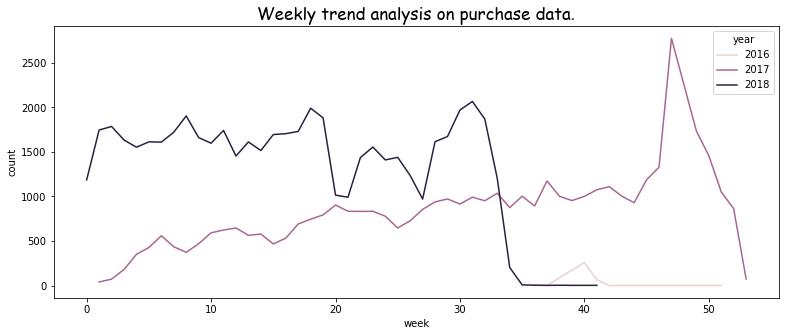

In [68]:
plt.figure(figsize=(13,5))
sns.lineplot(data=week, x='week', y='count',hue='year')
plt.title('Weekly trend analysis on purchase data.',fontsize=17,fontname='Comic Sans MS')
plt.show()

In [67]:
months = bigquery_client.query("""


select

    extract(year from order_purchase_timestamp) year,

    extract(month from order_purchase_timestamp) months,
    count(order_id) as count
from target.orders
group by year, months;
    
""").to_dataframe()
months['year'] = months['year'].astype('object')
months

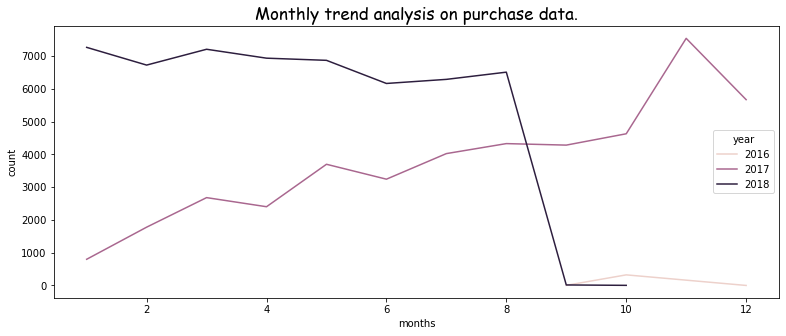

In [69]:
plt.figure(figsize=(13,5))
sns.lineplot(data=months, x='months', y='count',hue='year')
plt.title('Monthly trend analysis on purchase data.',fontsize=17,fontname='Comic Sans MS')
plt.show()

----------------

#### Observations:

-  From the above graph it can be concluded that there is a growing trend in Brazil in e-commerce.



-  By observing trends on 2017 and 2018 it can be colcluded that purchase in 2018 increased with a great difference and the yearly trend remains nutral to slight increasing and due to the lack of data nothing cannot be concluded about 2016.



- From the trends of 2016 and 2017 it can be concluded a slight peak can be shown between feb - apr.

In [169]:
Q4+' -Q4 ends'

'Is there a growing trend on e-commerce in Brazil? How can we describe a complete scenario? Can we see some seasonality with peaks at specific months? -Q4 ends'

---

### Q5) What time do Brazilian customers tend to buy (Dawn, Morning, Afternoon or Night)?

In [171]:
time = bigquery_client.query("""

select

        extract(year from order_purchase_timestamp) year,
        extract(month from order_purchase_timestamp) months,
        EXTRACT(HOUR FROM order_purchase_timestamp) AS hour,

        count(order_id) as count
    from target.orders
    group by year, months, hour
    order by count desc
    
""").to_dataframe()
time

year  months  hour  count
0    2018       3    14    529
1    2017      11    13    527
2    2018       5    16    527
3    2018       3    15    513
4    2018       3    16    511
..    ...     ...   ...    ...
515  2018       9    13      1
516  2016       9    12      1
517  2016      12    23      1
518  2017       3     3      1
519  2017       1     4      1

[520 rows x 4 columns]

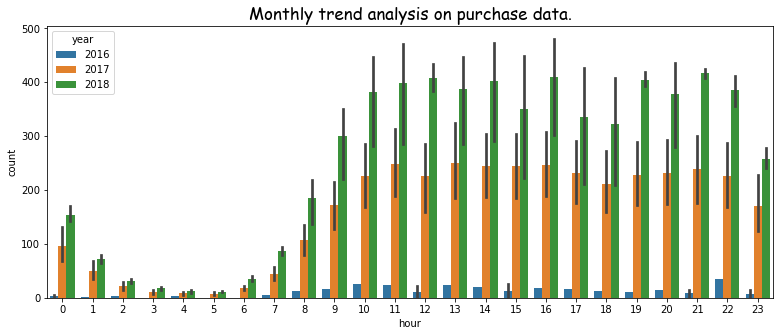

In [74]:
plt.figure(figsize=(13,5))
sns.barplot(data=time, x = 'hour',y='count',hue='year')
plt.title('Monthly trend analysis on purchase data.',fontsize=17,fontname='Comic Sans MS')
plt.show()

- **Dawn : 06:00**  


- **Morning : 06:00 - 12:00**


- **Afternoon : 15:00 - 18:00**


- **Night : Afer 18:00**

#### Observations: 


- Brazilian customer tends to buy mostly at Afternoon. 



In [172]:
Q5+ ' -Q5 ends.'

'What time do Brazilian customers tend to buy (Dawn, Morning, Afternoon or Night)? -Q5 ends.'

---

### Q6)Get month on month orders by region, states

In [77]:
m_on_m_state = bigquery_client.query("""


select x.customer_state, x.month, count(x.order_status) order_counts

from
(select customer_state, 
        extract(month from order_delivered_customer_date) month, 
        order_status

from target.orders o join target.customers c using(customer_id)

where (order_status != 'unavailable'  or order_status != 'canceled') and 
order_delivered_customer_date is not null) x

group by customer_state,month
order by month

""").to_dataframe()
m_on_m_state

customer_state  month  order_counts
0               RJ      1           931
1               SP      1          2731
2               PR      1           369
3               ES      1           145
4               MG      1           815
..             ...    ...           ...
319             SE     12            21
320             PB     12            26
321             TO     12            20
322             AP     12             2
323             AM     12             6

[324 rows x 3 columns]

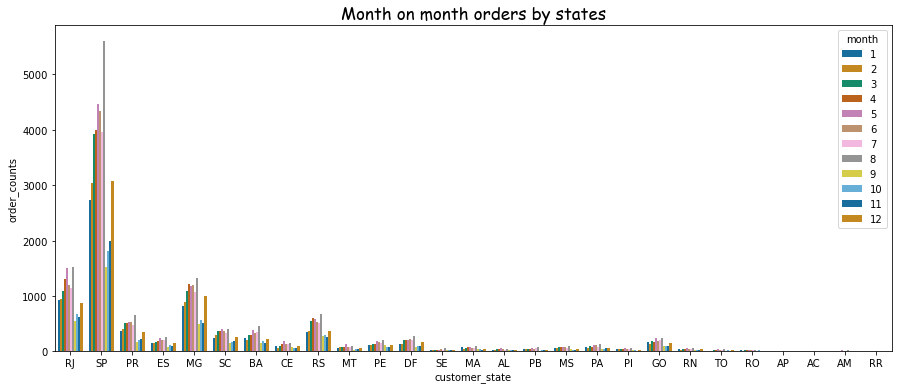

In [78]:
plt.figure(figsize=(15,6))
sns.barplot(data=m_on_m_state,x='customer_state',y='order_counts',hue='month',palette='colorblind')
plt.title('Month on month orders by states',fontsize=17,fontname='Comic Sans MS')
plt.show()

####  Observations:

-  **SP** has the most order counts in all of Brazil states.


- **RJ** and MG has the second most highest order counts.


- From the above plot  it can be concluded that august sees most order counts in most of the states.



In [173]:
Q6+' -Q6 ends.'

'Get month on month orders by region, states -Q6 ends.'

---

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Rough work.

In [80]:
pct_chng = bigquery_client.query("""

select z.months,z.count,z.m_on_m_pctchng from
(select y.months, y.count, y.prev_count, 100*(y.count-y.prev_count)/y.prev_count as m_on_m_pctchng
from(select x.months , x.count,
lag(count,1) over(order by months) prev_count,

from(select

    extract(month from order_purchase_timestamp) months,
    count(order_id) as count
from target.orders
group by  months
order by months) as x
order by x.months) as y) as z
    
""").to_dataframe()
# months['year'] = months['year'].astype('object')

In [175]:
# plt.figure(figsize=(13,5))
# sns.lineplot(data=pct_chng,x='months',y='m_on_m_pctchng',color='y')
# plt.title('Month-on-Month percentage change',fontsize=17,fontname='Comic Sans MS')
# plt.show()

In [82]:
state_wise_orders = bigquery_client.query("""

select x.customer_state,count(order_id) orders

from(select customer_id,customer_unique_id,customer_state,order_id, from target.orders 
join target.customers using(customer_id)
where order_status != 'unavailable')  x  
group by x.customer_state

""").to_dataframe()
x = []
for i in range(27):
    x.append(i)
    
values = []
for i in state_wise_orders.customer_state:
    values.append(i)


In [174]:


# state_wise_orders.plot(kind='bar',figsize=(13,5),color='lightgreen')
# plt.xticks(x,values)
# plt.title('State-wise order counts',fontsize=17,fontname='Comic Sans MS')
# plt.show()

In [85]:
# region = bigquery_client.query("""




# select  geolocation_lat,geolocation_lng, count(geolocation_lat) region_lat,count(geolocation_lng)region_lng


# from target.geolocation
# group by geolocation_lat,geolocation_lng

    
# """).to_dataframe()




### Rough work ends.

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

---

### Q7) How are customers distributed in Brazil 

In [87]:
region = bigquery_client.query("""

select   customer_state,count(customer_id) as cus_counts
from target.customers
group by customer_state

""").to_dataframe()
region

In [88]:
geometry = gpd.read_file('bcim_2016_21_11_2018.gpkg',layer='lim_Unidade_federacao_a')
geometry = geometry[['sigla','geometry']]

In [89]:
geometry = geometry.rename(columns={'sigla':'customer_state'})

In [90]:
region = state_wise_orders.merge(geometry,on='customer_state')

In [91]:
region1 = region[:]
region1 = region1.rename(columns={'customer_state':'state'})

In [92]:
region1.head(3)

region1 = GeoDataFrame(region1)
region1['orders'] = region1['orders'].astype('object')

In [93]:
region2= region1.sort_values(by='orders')
sorted_states = region2.state.values

Legend wise state codes : ['RR' 'AP' 'AC' 'AM' 'RO' 'TO' 'SE' 'AL' 'RN' 'PI' 'PB' 'MS' 'MA' 'MT'
 'PA' 'CE' 'PE' 'GO' 'ES' 'DF' 'BA' 'SC' 'PR' 'RS' 'MG' 'RJ' 'SP']


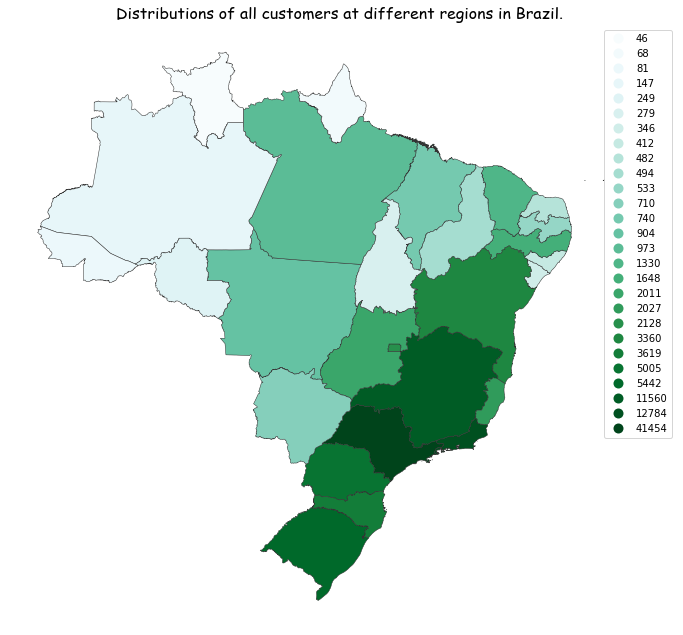

In [94]:
print('Legend wise state codes :',sorted_states)
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Distributions of all customers at different regions in Brazil. ',
             fontdict={'fontsize': '16', 'fontweight' : '3'},fontname='Comic Sans MS')
fig = region1.plot(column='orders', cmap='BuGn', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)
plt.show()

Count wise state codes: **RR , AP , AC , AM , RO , TO , SE , AL , RN , PI , PB , MS , MA , MT
 , PA , CE , PE , GO , ES , DF , BA , SC , PR , RS , MG , RJ , SP**

#### Observations

-  **SP** has most of the customers between all Brazil states.


-  **RJ** has the second most customers between all Brazil states.



-  **MG** has the third most customers between all Brazil states.

In [177]:
Q7+' -Q7 ends.'

'How are customers distributed in Brazil  -Q7 ends.'

---

### Q8) Get % increase in cost of orders from 2017 to 2018 (include months between Jan to Aug only)

In [180]:
pct_chng2 = bigquery_client.query("""

select 
    y.year,y.months, y.total_costs, 
    100*(y.total_costs-y.lag)/y.lag as pct_increased

from(select x.year, x.months, x.total_costs,
lag(total_costs) over(order by year, months) lag
from(select

    extract(year from shipping_limit_date) year,

    extract(month from shipping_limit_date) months,
    sum(price) as total_costs
from target.order_items
group by year, months)x


where (x.year = 2017 and x.months >= 1) or (x.year = 2018 and x.months <= 8)
order by year, months) y
    
""").to_dataframe() 

pct_chng2
# months['year'] = months['year'].astype('object')

year  months  total_costs  pct_increased
0   2017       1     80124.74            NaN
1   2017       2    245982.01     206.998825
2   2017       3    343242.60      39.539717
3   2017       4    308148.32     -10.224337
4   2017       5    505655.46      64.094829
5   2017       6    469001.05      -7.248890
6   2017       7    465282.10      -0.792951
7   2017       8    560093.34      20.377152
8   2017       9    617046.12      10.168444
9   2017      10    658020.23       6.640364
10  2017      11    883351.63      34.243841
11  2017      12    898920.98       1.762531
12  2018       1    845279.18      -5.967354
13  2018       2    819228.85      -3.081861
14  2018       3   1030527.84      25.792425
15  2018       4    958729.70      -6.967123
16  2018       5   1084358.55      13.103678
17  2018       6    870736.84     -19.700284
18  2018       7    811132.08      -6.845324
19  2018       8   1072147.70      32.179176

In [98]:
height = list(pct_chng2['pct_increased'])
x_pos = np.arange(len(pct_chng2.months))

In [190]:
x = []
for i in range(len(pct_chng2.year)):
    x.append(i)
    

values1 = ['2017 Jan', '2017 Feb','2017 Mar', '2017 Apr','2017 May','2017 Jun','2017 Jul', '2017 Aug','2017 Sept', '2017 Oct', '2017 Nov', '2017 Dec','2018 Jan', '2018 Feb', '2018 Mar', '2018 Apr', '2018 May', '2018 Jun','2018 Jul', '2018 Aug']


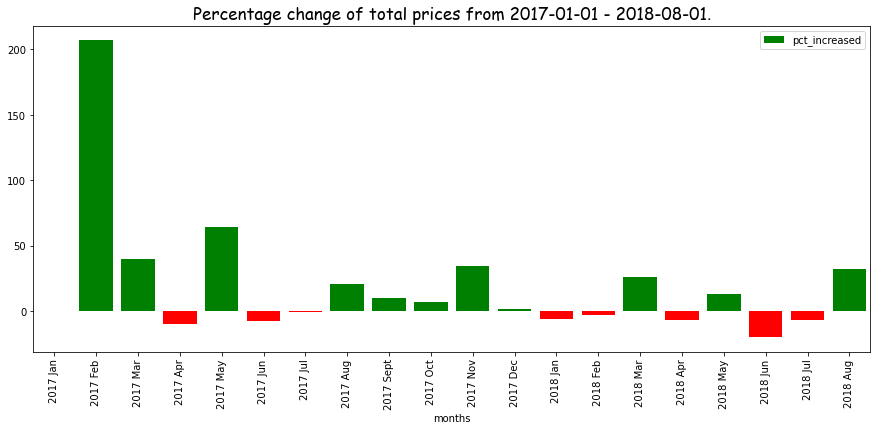

In [187]:
pct_chng2.plot(kind='bar',x='months',y='pct_increased',color='g',figsize=(15,6))
plt.bar(x_pos,height,color=['g','g','g','r','g','r','r','g','g','g','g','g','r','r','g','r','g','r','r','g'])
plt.title('Percentage change of total prices from 2017-01-01 - 2018-08-01.',fontsize=17,fontname='Comic Sans MS')
plt.xticks(x,values1)
plt.show()


#### Observations :

- Mostly percentage change of total price gets negative on april, june and july which is cyclical.



- 2017 Jan - 2017 Feb sees the highest percentage increase in overall time span.

In [225]:
Q8+' -Q8 ends.'

'Get % increase in cost of orders from 2017 to 2018 (include months between Jan to Aug only) -Q8 ends.'

---

### Q9) Mean & Sum of price and freight value by customer state

In [150]:
mean_sum = bigquery_client.query("""

select x.customer_state, 
round(sum(price),2) sum_price, avg(price) mean_price, 
sum(freight_value) sum_freight_value, avg(freight_value) mean_freight_value, 
sum(total_price) sum_total, avg(total_price) mean_total,

from(select  customer_state,price,freight_value, (price + freight_value) total_price
from target.customers c join target.orders o using(customer_id)
join target.order_items oi using(order_id)) x
group by customer_state

""").to_dataframe()
mean_sum

customer_state   sum_price  mean_price  sum_freight_value  \
0              MT   156453.53  148.297185           29715.43   
1              MA   119648.22  145.204150           31523.77   
2              AL    80314.81  180.889212           15914.59   
3              SP  5202955.05  109.653629          718723.07   
4              MG  1585308.03  120.748574          270853.46   
5              PE   262788.03  145.508322           59449.66   
6              RJ  1824092.67  125.117818          305589.31   
7              DF   302603.94  125.770549           50625.50   
8              RS   750304.02  120.337453          135522.74   
9              SE    58920.85  153.041169           14111.47   
10             PR   683083.76  119.004139          117851.68   
11             PA   178947.81  165.692417           38699.30   
12             BA   511349.99  134.601208          100156.68   
13             CE   227254.71  153.758261           48351.59   
14             GO   294591.95  126.271732           53114.98   
15             ES   275037.31  121.913701           49764.60   
16             SC   520553.34  124.653578           89660.26   
17             PI    86914.08  160.358081           21218.20   
18             PB   115268.08  191.475216           25719.73   
19             RN    83034.98  156.965936           18860.10   
20             AM    22356.84  135.496000            5478.89   
21             RR     7829.43  150.565962            2235.19   
22             MS   116812.64  142.628376           19144.03   
23             TO    49621.74  157.529333           11732.68   
24             AC    15982.95  173.727717            3686.75   
25             RO    46140.64  165.973525           11417.38   
26             AP    13474.30  164.320732            2788.50   

    mean_freight_value   sum_total  mean_total  
0            28.166284   186168.96  176.463469  
1            38.257002   151171.99  183.461153  
2            35.843671    96229.40  216.732883  
3            15.147275  5921678.12  124.800905  
4            20.630167  1856161.49  141.378741  
5            32.917863   322237.69  178.426185  
6            20.960924  2129681.98  146.078742  
7            21.041355   353229.44  146.811904  
8            21.735804   885826.76  142.073257  
9            36.653169    73032.32  189.694338  
10           20.531652   800935.44  139.535791  
11           35.832685   217647.11  201.525102  
12           26.363959   611506.67  160.965167  
13           32.714202   275606.30  186.472463  
14           22.766815   347706.93  149.038547  
15           22.058777   324801.91  143.972478  
16           21.470369   610213.60  146.123946  
17           39.147970   108132.28  199.506052  
18           42.723804   140987.81  234.199020  
19           35.652363   101895.08  192.618299  
20           33.205394    27835.73  168.701394  
21           42.984423    10064.62  193.550385  
22           23.374884   135956.67  166.003260  
23           37.246603    61354.42  194.775937  
24           40.073370    19669.70  213.801087  
25           41.069712    57558.02  207.043237  
26           34.006098    16262.80  198.326829

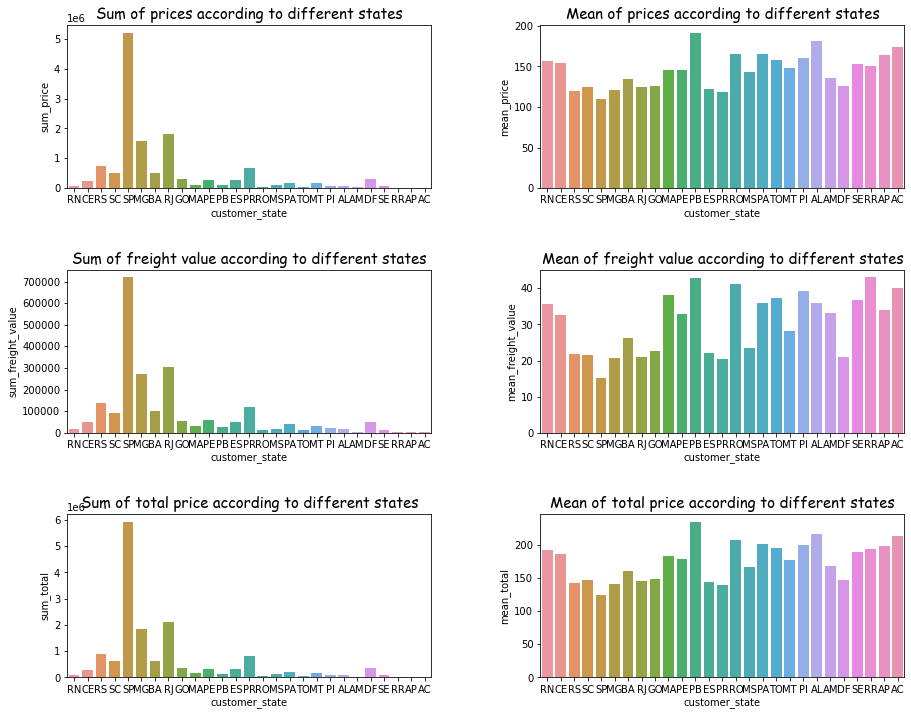

In [103]:
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(321)
sns.barplot(data=mean_sum,x='customer_state',y='sum_price')
plt.title('Sum of prices according to different states',

fontsize=15,
fontname='Comic Sans MS')

ax = fig.add_subplot(322)
sns.barplot(data=mean_sum,x='customer_state',y='mean_price')
plt.title('Mean of prices according to different states',

fontsize=15,
fontname='Comic Sans MS')

ax = fig.add_subplot(323)
sns.barplot(data=mean_sum,x='customer_state',y='sum_freight_value')
plt.title('Sum of freight value according to different states',

fontsize=15,
fontname='Comic Sans MS')

ax = fig.add_subplot(324)
sns.barplot(data=mean_sum,x='customer_state',y='mean_freight_value')
plt.title('Mean of freight value according to different states',

fontsize=15,
fontname='Comic Sans MS')

ax = fig.add_subplot(325)
sns.barplot(data=mean_sum,x='customer_state',y='sum_total')
plt.title('Sum of total price according to different states',

fontsize=15,
fontname='Comic Sans MS')

ax = fig.add_subplot(326)
sns.barplot(data=mean_sum,x='customer_state',y='mean_total')
plt.title('Mean of total price according to different states',

fontsize=15,
fontname='Comic Sans MS')
plt.subplots_adjust(wspace=0.3, hspace=.5)
plt.show()

#### Observations:


- According to sum of price, freight value and total value SP leads between all the states in Brazil.


- According to mean of price, freight value and total value PB leads between all the states in Brazil.



- Specifically  RR have near about same mean freight value of 40+ with PB.


- SP ,PR, DF are the states that has least freight value. 

In [223]:
Q9+' -Q10 ends.'

'Mean & Sum of price and freight value by customer state -Q10 ends.'

---

### Q10) Calculate days between purchasing, delivering and estimated delivery

In [195]:
pur_del_estdel = bigquery_client.query("""


select x.order_purchase_timestamp, x.days_to_delivery, x.estdays_to_delivery


from
(select 
    w.*,
date_diff(w.order_delivered_customer_date,
    w.order_purchase_timestamp,day) days_to_delivery,

date_diff(w.order_estimated_delivery_date,
    w.order_purchase_timestamp,day) estdays_to_delivery,


from
(select 
    order_purchase_timestamp,
    order_delivered_customer_date,
    order_estimated_delivery_date
    
from  target.orders
where order_delivered_customer_date is not null) w) x

""").to_dataframe()
pur_del_estdel

order_purchase_timestamp  days_to_delivery  estdays_to_delivery
0     2018-02-19 19:48:52+00:00                30                   17
1     2016-10-09 15:39:56+00:00                30                   59
2     2016-10-03 21:01:41+00:00                35                   52
3     2017-04-15 15:37:38+00:00                30                   32
4     2017-04-14 22:21:54+00:00                32                   33
...                         ...               ...                  ...
96471 2018-04-01 21:29:36+00:00                28                   22
96472 2017-04-26 22:51:19+00:00                28                   34
96473 2018-02-28 11:14:58+00:00                28                   22
96474 2018-03-04 21:37:02+00:00                28                   18
96475 2018-03-06 11:39:57+00:00                28                   16

[96476 rows x 3 columns]

Visualisation of days to delivery(x axis) and estimated days to delivery(y axis)
-----------------------------------------------------------------------------------


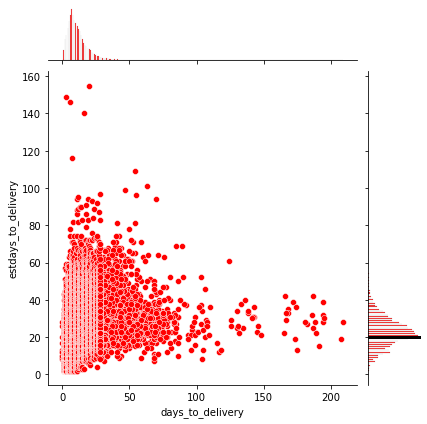

In [213]:
sns.jointplot(data=pur_del_estdel,x='days_to_delivery',y='estdays_to_delivery',color='r')

print('Visualisation of days to delivery(x axis) and estimated days to delivery(y axis)')
print('-----------------------------------------------------------------------------------')
plt.axhline(y=20,color='black',lw='3')
plt.show()

####  Observations:

- From the above plot it can be colcluded that both days to delivery and estimated days to delivery have similar distribution range which states most of the orders have 0 - 50 days of time span for delivery.



- Distribution for estimated days to delivery is rightskewed.



-  Days to delivery is normally distributed.



-  On an average 60% of orders are delivered in 20 days.

In [220]:
Q10+' -Q10 ends.'

'Calculate days between purchasing, delivering and estimated delivery -Q10 ends.'

---

### Q11) time_to_delivery = order_purchase_timestamp-order_delivered_customer_date

In [113]:
diff_estimated_delivery = bigquery_client.query("""

select 
    w.*,
date_diff(w.order_estimated_delivery_date,
    w.order_delivered_customer_date,day) daysdiff_estimated_delivery,
date_diff(w.order_estimated_delivery_date,
    w.order_delivered_customer_date,hour) hrs_diff_estimated_delivery 

from
(select 
    order_estimated_delivery_date,
    order_delivered_customer_date,
    
from  target.orders) w


""").to_dataframe()
diff_estimated_delivery

order_estimated_delivery_date order_delivered_customer_date  \
0         2016-11-29 00:00:00+00:00     2016-10-14 15:07:11+00:00   
1         2018-03-09 00:00:00+00:00     2018-03-21 22:03:51+00:00   
2         2016-12-08 00:00:00+00:00     2016-11-09 14:53:50+00:00   
3         2016-11-30 00:00:00+00:00     2016-10-16 14:36:59+00:00   
4         2016-11-30 00:00:00+00:00     2016-10-19 18:47:43+00:00   
...                             ...                           ...   
99436     2017-09-28 00:00:00+00:00     2017-09-29 16:35:35+00:00   
99437     2017-09-28 00:00:00+00:00     2017-09-29 19:35:44+00:00   
99438     2017-05-31 00:00:00+00:00     2017-06-01 11:59:55+00:00   
99439     2018-03-23 00:00:00+00:00     2018-03-24 16:12:29+00:00   
99440     2018-03-23 00:00:00+00:00     2018-03-24 15:04:15+00:00   

       daysdiff_estimated_delivery  hrs_diff_estimated_delivery  
0                               45                         1088  
1                              -12                         -310  
2                               28                          681  
3                               44                         1065  
4                               41                          989  
...                            ...                          ...  
99436                           -1                          -40  
99437                           -1                          -43  
99438                           -1                          -35  
99439                           -1                          -40  
99440                           -1                          -39  

[99441 rows x 4 columns]

In [279]:
bigquery_client.query("""

select 
    w.*,
date_diff(w.order_estimated_delivery_date,
    w.order_delivered_customer_date,day) daysdiff_estimated_delivery,
date_diff(w.order_estimated_delivery_date,
    w.order_delivered_customer_date,hour) hrs_diff_estimated_delivery 

from
(select 
    order_estimated_delivery_date,
    order_delivered_customer_date,
    
from  target.orders) w
where order_delivered_customer_date is not null
order by daysdiff_estimated_delivery
limit 5


""").to_dataframe()

order_estimated_delivery_date order_delivered_customer_date  \
0     2018-03-15 00:00:00+00:00     2018-09-19 23:24:07+00:00   
1     2017-03-22 00:00:00+00:00     2017-09-19 14:36:39+00:00   
2     2018-01-19 00:00:00+00:00     2018-07-13 20:51:31+00:00   
3     2017-04-05 00:00:00+00:00     2017-09-19 17:00:07+00:00   
4     2017-04-06 00:00:00+00:00     2017-09-19 14:00:04+00:00   

   daysdiff_estimated_delivery  hrs_diff_estimated_delivery  
0                         -188                        -4535  
1                         -181                        -4358  
2                         -175                        -4220  
3                         -167                        -4025  
4                         -166                        -3998

**negative values signifies the days that an order took more than estimated delivery**

- the slowest delivery delivered the product 188 days after the estimated delivery.

In [280]:
bigquery_client.query("""

select 
w.*,
date_diff(w.order_estimated_delivery_date,
    w.order_delivered_customer_date,day) daysdiff_estimated_delivery,
date_diff(w.order_estimated_delivery_date,
    w.order_delivered_customer_date,hour) hrs_diff_estimated_delivery 

from
(select 
    order_estimated_delivery_date,
    order_delivered_customer_date,
    
from  target.orders) w
where order_delivered_customer_date is not null
order by daysdiff_estimated_delivery desc
limit 5


""").to_dataframe()

order_estimated_delivery_date order_delivered_customer_date  \
0     2018-08-03 00:00:00+00:00     2018-03-09 23:36:47+00:00   
1     2017-07-04 00:00:00+00:00     2017-02-14 14:27:45+00:00   
2     2018-07-12 00:00:00+00:00     2018-02-27 16:35:43+00:00   
3     2017-10-11 00:00:00+00:00     2017-06-09 13:35:54+00:00   
4     2018-01-30 00:00:00+00:00     2017-10-13 13:49:07+00:00   

   daysdiff_estimated_delivery  hrs_diff_estimated_delivery  
0                          146                         3504  
1                          139                         3345  
2                          134                         3223  
3                          123                         2962  
4                          108                         2602

**positive values signifies the days that an order took less than estimated delivery**

- the fastest delivery delivered the product 146 day before estimated delivery.

In [281]:
Q11+' -Q11 ends.'

'time_to_delivery = order_purchase_timestamp-order_delivered_customer_date -Q11 ends.'

---

### Q12) diff_estimated_delivery = order_estimated_delivery_date-order_delivered_customer_date

In [110]:
datediff = bigquery_client.query("""

select 
w.*,
date_diff(   w.order_delivered_customer_date,
    w.order_purchase_timestamp  ,day) days_to_delivery,
date_diff(w.order_delivered_customer_date,
    w.order_purchase_timestamp,hour) hours_to_delivery

from
(select 
    order_purchase_timestamp,
    order_delivered_customer_date
    
from  target.orders
where order_delivered_customer_date is not null) w

""").to_dataframe()
datediff

order_purchase_timestamp order_delivered_customer_date  \
0     2018-02-19 19:48:52+00:00     2018-03-21 22:03:51+00:00   
1     2016-10-09 15:39:56+00:00     2016-11-09 14:53:50+00:00   
2     2016-10-03 21:01:41+00:00     2016-11-08 10:58:34+00:00   
3     2017-04-15 15:37:38+00:00     2017-05-16 14:49:55+00:00   
4     2017-04-14 22:21:54+00:00     2017-05-17 10:52:15+00:00   
...                         ...                           ...   
96471 2018-04-01 21:29:36+00:00     2018-04-30 20:39:38+00:00   
96472 2017-04-26 22:51:19+00:00     2017-05-25 14:42:40+00:00   
96473 2018-02-28 11:14:58+00:00     2018-03-28 20:58:25+00:00   
96474 2018-03-04 21:37:02+00:00     2018-04-02 17:37:50+00:00   
96475 2018-03-06 11:39:57+00:00     2018-04-03 17:42:34+00:00   

       days_to_delhivery  hours_to_delhivery  
0                     30                 722  
1                     30                 743  
2                     35                 853  
3                     30                 743  
4                     32                 780  
...                  ...                 ...  
96471                 28                 695  
96472                 28                 687  
96473                 28                 681  
96474                 28                 692  
96475                 28                 678  

[96476 rows x 4 columns]

In [231]:
Q12+' -Q12 ends.'

'diff_estimated_delivery = order_estimated_delivery_date-order_delivered_customer_date -Q12 ends.'

---

### Q13) Group data by state, take mean of freight_value, time_to_delivery, diff_estimated_delivery

In [251]:
mean1 = bigquery_client.query("""

select x.customer_state,
avg(x.freight_value) mean_freight_value,
avg(x.daysdiff_estimated_delivery) mean_estdaydiff_del,
avg(x.days_to_delivery) mean_daystodel


from(select  
        customer_state,
        order_purchase_timestamp,
        order_delivered_customer_date,
        order_estimated_delivery_date,
        freight_value,
        date_diff(order_estimated_delivery_date,
            order_delivered_customer_date,day) daysdiff_estimated_delivery,
        date_diff(order_delivered_customer_date,
            order_purchase_timestamp,day) days_to_delivery


from target.customers c
join target.orders o using(customer_id)
join target.order_items oi using(order_id) 
where order_delivered_customer_date is not null) x
group by x.customer_state
order by mean_freight_value , mean_daystodel , mean_estdaydiff_del

""").to_dataframe()
mean1.head()

customer_state  mean_freight_value  mean_estdaydiff_del  mean_daystodel
0             SP           15.114994            10.265594        8.259609
1             PR           20.471816            12.533900       11.480793
2             MG           20.625837            12.397151       11.515522
3             RJ           20.909784            11.144493       14.689382
4             DF           21.072161            11.274735       12.501486

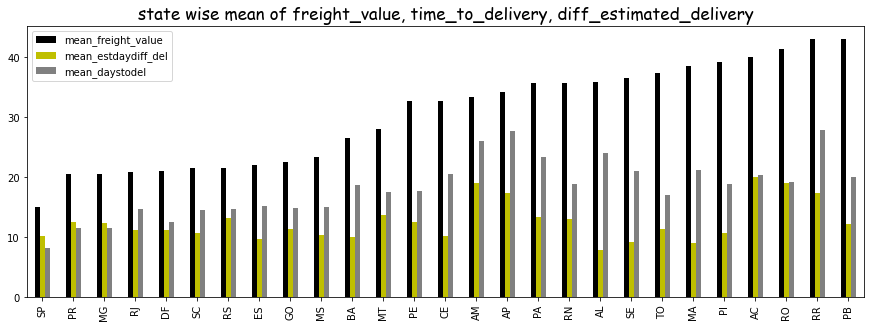

In [252]:
x = []
for i in range(27):
    x.append(i)
    
values = []
for i in mean1.customer_state:
    values.append(i)

mean1.plot(kind='bar',figsize=(15,5),color=['black','y','grey'])
plt.xticks(x,values)
plt.title('state wise mean of freight_value, time_to_delivery, diff_estimated_delivery',fontsize=17,fontname='Comic Sans MS')
plt.show()

#### Observations :

-  **SP** has the least freight value and average days to delivery with freight value of 15 and average days to delivery of 8 days and average estimated days to delivery of 10 days.




-  **PB** has the highest freight value with 40 and average days to delivery of approx 19 days and average estimated days to delivery of approx 11 days.




-  **AP** has the highest average days to delivery with approx 26 days to delivery and freight value of approx 31 and average estimated days to delivery of approx 18 days.




-  **AP** has the highest average days to delivery with approx 26 days to delivery and freight value of approx 31 and estimated days to delivery of approx 18 days.




-  **AM** has the highest average estimated days to delivery with approx 19 days and freight value of approx 32 and average days to delivery of approx 23 days.

In [233]:
Q13

'Group data by state, take mean of freight_value, time_to_delivery, diff_estimated_delivery'

---

### Q14) Top 5 states with highest/lowest average freight value - sort in desc/asc limit 5

In [120]:
top5mean1_f = bigquery_client.query("""

select x.customer_state,
avg(x.freight_value) mean_freight_value,



from(select  
        customer_state,
        order_purchase_timestamp,
        order_delivered_customer_date,
        order_estimated_delivery_date,
        freight_value,
        date_diff(order_estimated_delivery_date,
            order_delivered_customer_date,day) daysdiff_estimated_delivery,
        date_diff(order_delivered_customer_date,
            order_purchase_timestamp,day) days_to_delivery


from target.customers c
join target.orders o using(customer_id)
join target.order_items oi using(order_id) 
where order_delivered_customer_date is not null) x
group by x.customer_state
order by mean_freight_value desc
limit 5

""").to_dataframe()
top5mean1_f

customer_state  mean_freight_value
0             PB           43.091689
1             RR           43.088043
2             RO           41.330549
3             AC           40.047912
4             PI           39.115086

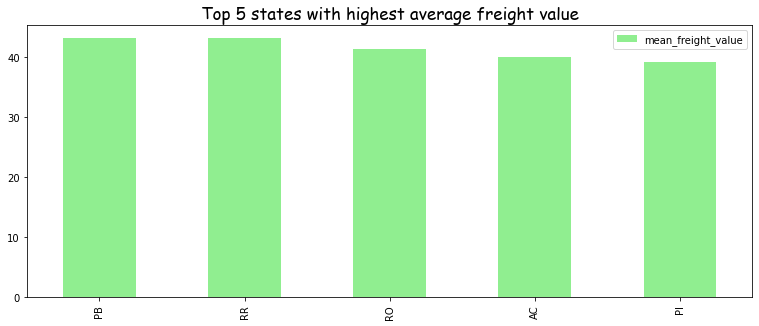

In [122]:
x = []
for i in range(5):
    x.append(i)
    
values = []
for i in top5mean1_f.customer_state:
    values.append(i)

top5mean1_f.plot(kind='bar',figsize=(13,5),color=['lightgreen'])
plt.xticks(x,values)
plt.title('Top 5 states with highest average freight value',fontsize=17,fontname='Comic Sans MS')
plt.show()

#### Ovservation:

-  **PB** has the highest freight value among top 5 states with freight value.




In [121]:
bottom5mean1_f = bigquery_client.query("""

select x.customer_state,
avg(x.freight_value) mean_freight_value,



from(select  
        customer_state,
        order_purchase_timestamp,
        order_delivered_customer_date,
        order_estimated_delivery_date,
        freight_value,
        date_diff(order_estimated_delivery_date,
            order_delivered_customer_date,day) daysdiff_estimated_delivery,
        date_diff(order_delivered_customer_date,
            order_purchase_timestamp,day) days_to_delivery


from target.customers c
join target.orders o using(customer_id)
join target.order_items oi using(order_id) 
where order_delivered_customer_date is not null) x
group by x.customer_state
order by mean_freight_value 
limit 5

""").to_dataframe()
bottom5mean1_f

customer_state  mean_freight_value
0             SP           15.114994
1             PR           20.471816
2             MG           20.625837
3             RJ           20.909784
4             DF           21.072161

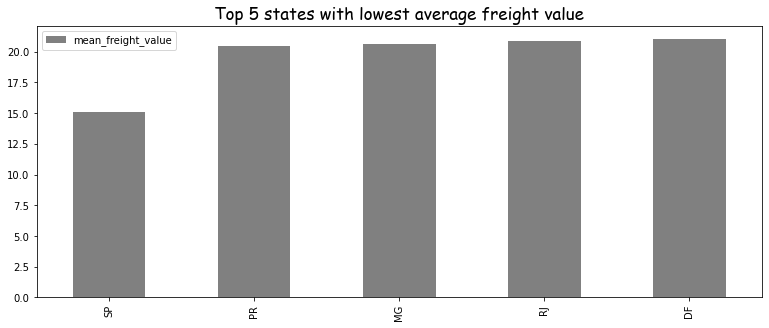

In [123]:
x = []
for i in range(5):
    x.append(i)
    
values = []
for i in bottom5mean1_f.customer_state:
    values.append(i)

bottom5mean1_f.plot(kind='bar',figsize=(13,5),color=['grey'])
plt.xticks(x,values)
plt.title('Top 5 states with lowest average freight value',fontsize=17,fontname='Comic Sans MS')
plt.show()

#### Observations:

-  State with least freight value is **SP**.





In [236]:
Q14+' -Q14 ends.'

'Top 5 states with highest/lowest average freight value - sort in desc/asc limit 5 -Q14 ends.'

---

### Q15) Top 5 states with highest/lowest average time to delivery

In [126]:
lowest_avg_ttd = bigquery_client.query("""

select x.customer_state,
avg(x.days_to_delivery) mean_daystodel


from(select  
        customer_state,
        order_purchase_timestamp,
        order_delivered_customer_date,
        order_estimated_delivery_date,
        freight_value,
        date_diff(order_estimated_delivery_date,
            order_delivered_customer_date,day) daysdiff_estimated_delivery,
        date_diff(order_delivered_customer_date,
            order_purchase_timestamp,day) days_to_delivery


from target.customers c
join target.orders o using(customer_id)
join target.order_items oi using(order_id) 
where order_delivered_customer_date is not null) x
group by x.customer_state

order by mean_daystodel 
limit 5


""").to_dataframe()
lowest_avg_ttd


customer_state  mean_daystodel
0             SP        8.259609
1             PR       11.480793
2             MG       11.515522
3             DF       12.501486
4             SC       14.520986

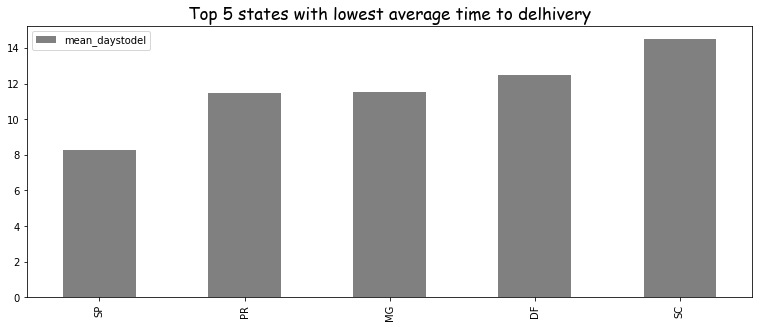

In [129]:
x = []
for i in range(5):
    x.append(i)
    
values = []
for i in lowest_avg_ttd.customer_state:
    values.append(i)

lowest_avg_ttd.plot(kind='bar',figsize=(13,5),color=['grey'])
plt.xticks(x,values)
plt.title('Top 5 states with lowest average time to delivery',fontsize=17,fontname='Comic Sans MS')
plt.show()

####  Observations:
-  State that have least time to delivery is **SP**.





In [127]:
highest_avg_ttd = bigquery_client.query("""

select x.customer_state,
avg(x.days_to_delivery) mean_daystodel


from(select  
        customer_state,
        order_purchase_timestamp,
        order_delivered_customer_date,
        order_estimated_delivery_date,
        freight_value,
        date_diff(order_estimated_delivery_date,
            order_delivered_customer_date,day) daysdiff_estimated_delivery,
        date_diff(order_delivered_customer_date,
            order_purchase_timestamp,day) days_to_delivery


from target.customers c
join target.orders o using(customer_id)
join target.order_items oi using(order_id) 
where order_delivered_customer_date is not null) x
group by x.customer_state

order by mean_daystodel desc
limit 5


""").to_dataframe()
highest_avg_ttd

customer_state  mean_daystodel
0             RR       27.826087
1             AP       27.753086
2             AM       25.963190
3             AL       23.992974
4             PA       23.301708

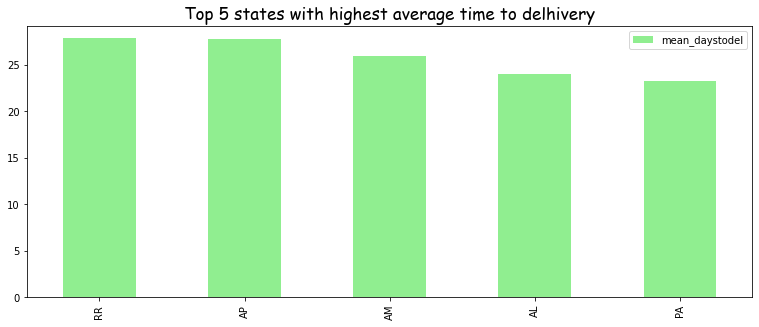

In [128]:
x = []
for i in range(5):
    x.append(i)
    
values = []
for i in highest_avg_ttd.customer_state:
    values.append(i)

highest_avg_ttd.plot(kind='bar',figsize=(13,5),color=['lightgreen'])
plt.xticks(x,values)
plt.title('Top 5 states with highest average time to delivery',fontsize=17,fontname='Comic Sans MS')
plt.show()

####  Observations:
-  State that have highest time to delivery is **RR**. 




In [238]:
Q15+' -Q15 ends.'

'Top 5 states with highest/lowest average time to delivery -Q15 ends.'

---

### Q16) Top 5 states where delivery is really fast/ not so fast compared to estimated date

In [132]:
top5_fast = bigquery_client.query("""

select x.customer_state,avg(x.daysdiff_estimated_delivery) avg_est_daysdiff


from(select  
        customer_state,
        order_purchase_timestamp,
        order_delivered_customer_date,
        order_estimated_delivery_date,
        freight_value,
        date_diff(order_estimated_delivery_date,
            order_delivered_customer_date,day) daysdiff_estimated_delivery,
        date_diff(order_delivered_customer_date,
            order_purchase_timestamp,day) days_to_delivery


from target.customers c
join target.orders o using(customer_id)
join target.order_items oi using(order_id) 
where order_delivered_customer_date is not null) x
group by customer_state
order by avg_est_daysdiff desc
limit 5


""").to_dataframe()
top5_fast

customer_state  avg_est_daysdiff
0             AC         20.010989
1             RO         19.080586
2             AM         18.975460
3             AP         17.444444
4             RR         17.434783

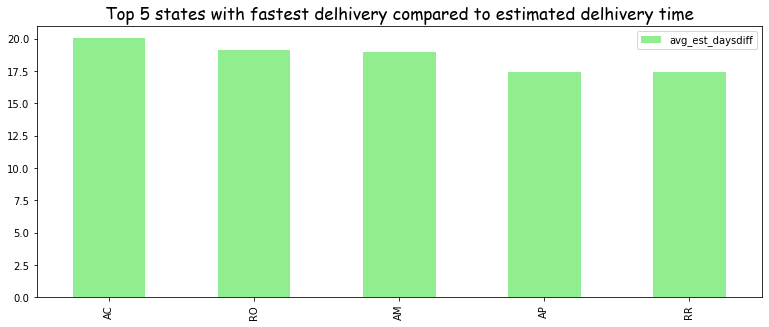

In [134]:
x = []
for i in range(5):
    x.append(i)
    
values = []
for i in top5_fast.customer_state:
    values.append(i)

top5_fast.plot(kind='bar',figsize=(13,5),color=['lightgreen'])
plt.xticks(x,values)
plt.title('Top 5 states with fastest delivery compared to estimated delivery time',fontsize=17,fontname='Comic Sans MS')
plt.show()

####  Observations:
-  State that have fastest time to delivery is **AC**.


In [133]:
top5_slow = bigquery_client.query("""

select x.customer_state,avg(x.daysdiff_estimated_delivery) avg_est_daysdiff


from(select  
        customer_state,
        order_purchase_timestamp,
        order_delivered_customer_date,
        order_estimated_delivery_date,
        freight_value,
        date_diff(order_estimated_delivery_date,
            order_delivered_customer_date,day) daysdiff_estimated_delivery,
        date_diff(order_delivered_customer_date,
            order_purchase_timestamp,day) days_to_delivery


from target.customers c
join target.orders o using(customer_id)
join target.order_items oi using(order_id) 
where order_delivered_customer_date is not null) x
group by customer_state
order by avg_est_daysdiff
limit 5


""").to_dataframe()
top5_slow

customer_state  avg_est_daysdiff
0             AL          7.976581
1             MA          9.110000
2             SE          9.165333
3             ES          9.768539
4             BA         10.119468

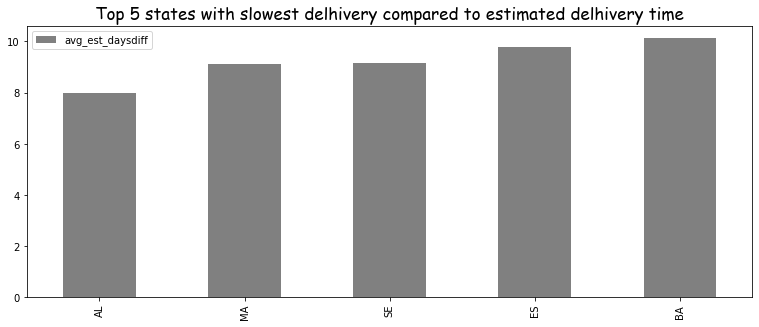

In [135]:
x = []
for i in range(5):
    x.append(i)
    
values = []
for i in top5_slow.customer_state:
    values.append(i)

top5_slow.plot(kind='bar',figsize=(13,5),color=['grey'])
plt.xticks(x,values)
plt.title('Top 5 states with slowest delivery compared to estimated delivery time',fontsize=17,fontname='Comic Sans MS')
plt.show()

####  Observations:
-  State that have slowest time to delivery is **AL**.

In [240]:
Q16

'Top 5 states where delivery is really fast/ not so fast compared to estimated date'

---

### Q17) Month over Month count of orders for different payment types

In [138]:
payment_type = bigquery_client.query("""


select  x.payment_type,count(x.order_status) no_of_orders,(x.month)

from(select payment_type,order_status,order_id,
order_purchase_timestamp,extract(month from order_purchase_timestamp) month

from target.payments p join target.orders o using(order_id)
where order_status != 'unavailable'  or order_status != 'canceled') x
group by payment_type,month
order by  month

""").to_dataframe()
payment_type.head()

payment_type  no_of_orders  month
0      voucher           477      1
1  credit_card          6103      1
2   debit_card           118      1
3          UPI          1715      1
4  credit_card          6609      2

In [254]:
x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

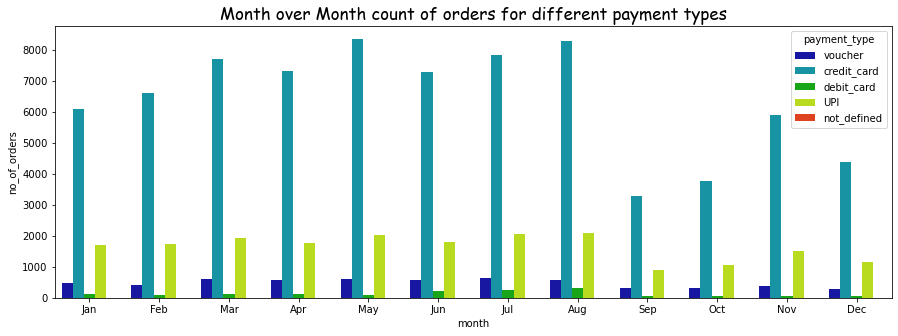

In [255]:
x = []
for i in range(12):
    x.append(i)
value = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    


plt.figure(figsize=(15,5))
sns.barplot(data = payment_type,x = 'month',y='no_of_orders',hue='payment_type',palette='nipy_spectral')
plt.title('Month over Month count of orders for different payment types',fontsize=17,fontname='Comic Sans MS')
plt.xticks(x,value)
plt.show()

#### Observations:

-  From the above plot it can be concluded that most no of the payments are done in the months of may and aug.



-  Credit card is mostly used as a transaction type in Brazil.



-  Next most used method of transaction is UPI in Brazil.



-  From the above plot it can be concluded that least no of the payments are done in the month of sep.

In [242]:
Q17+' -Q17 ends.'

'Month over Month count of orders for different payment types -Q17 ends.'

---

### Q18) Distribution of payment installments and count of orders

In [142]:
pay_inst = bigquery_client.query("""




select payment_installments,count(order_status) order_counts

from target.payments p join target.orders o using(order_id)
where order_status != 'unavailable'  or order_status != 'canceled'
group by payment_installments


""").to_dataframe()
pay_inst

payment_installments  order_counts
0                      0             2
1                      1         52546
2                      2         12413
3                      3         10461
4                      4          7098
5                      5          5239
6                      6          3920
7                      7          1626
8                      8          4268
9                      9           644
10                    10          5328
11                    11            23
12                    12           133
13                    13            16
14                    14            15
15                    15            74
16                    16             5
17                    17             8
18                    18            27
19                    20            17
20                    21             3
21                    22             1
22                    23             1
23                    24            18

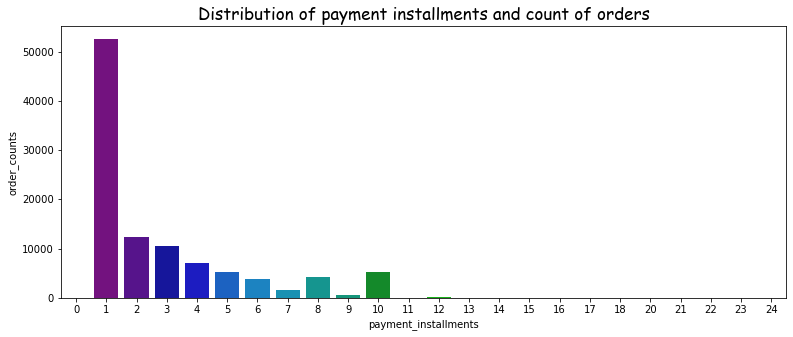

In [143]:
plt.figure(figsize=(13,5))
sns.barplot(data = pay_inst,x = 'payment_installments',y='order_counts',palette='nipy_spectral')
plt.title('Distribution of payment installments and count of orders',fontsize=17,fontname='Comic Sans MS')
plt.show()

#### Observations:

-  While purchasing products more than 50000 orders are made in one installments which is highest in numbers of all.


-  Good number of users tends to buy products with atmax 10 installments.






In [262]:
Q18+' -Q18 ends.'

'Distribution of payment installments and count of orders -Q18 ends.'

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

---

## **INSIGHTS:**


---

### ***Observations***


                   

**Observations from In-depth Exploration:**




- Brazilian customer tends to buy mostly at Afternoon. 




-  From the above graph it can be concluded that there is a growing trend in Brazil in e-commerce.



-  By observing trends on 2017 and 2018 it can be colcluded that purchase in 2018 increased with a great difference and the yearly trend remains nutral to slight increasing and due to the lack of data nothing cannot be concluded about 2016.



- From the trends of 2016 and 2017 it can be concluded a slight peak can be shown between feb - apr which states there is a cyclical trends.      




**Evolution of E-commerce orders in the Brazil region:**





-  **SP** has the most order counts in all of Brazil states.




- **RJ** and MG has the second most highest order counts.



- From the above plot  it can be concluded that august sees most order counts in most of the states.




-  **SP** has most of the customers between all Brazil states.



-  **RJ** has the second most customers between all Brazil states.



-  **MG** has the third most customers between all Brazil states.        




**Impact on Economy: Analyze the money movemented by e-commerce by looking at order prices, freight and others.**    




- Mostly percentage change of total price gets negative on april, june and july which is cyclical.



- 2017 Jan - 2017 Feb sees the highest percentage increase in overall time span.




- According to sum of price, freight value and total value SP leads between all the states in Brazil.



- According to mean of price, freight value and total value PB leads between all the states in Brazil.




- Specifically  RR have near about same mean freight value of 40+ with PB.



- SP ,PR, DF are the states that has least freight value. 




**Analysis on sales, freight and delivery time**



- From the above plot it can be colcluded that both days to delivery and estimated days to delivery have similar distribution range which states most of the orders have 0 - 50 days of time span for delivery.



- Distribution for estimated days to delivery is rightskewed.



-  Days to delivery is normally distributed.



-  On an average 60% of orders are delivered in 20 days.



**Create columns:**

-  **SP** has the least freight value and average days to delivery with freight value of 15 and average days to delivery of 8 days and average estimated days to delivery of 10 days.




-  **PB** has the highest freight value with 40 and average days to delivery of approx 19 days and average estimated days to delivery of approx 11 days.




-  **AP** has the highest average days to delivery with approx 26 days to delivery and freight value of approx 31 and average estimated days to delivery of approx 18 days.




-  **AP** has the highest average days to delivery with approx 26 days to delivery and freight value of approx 31 and estimated days to delivery of approx 18 days.




-  **AM** has the highest average estimated days to delivery with approx 19 days and freight value of approx 32 and average days to delivery of approx 23 days.




**Sort the data to get the following:**



-  **PB** has the highest freight value among top 5 states with freight value.



-  State with least freight value is **SP**.



-  State that have least time to delivery is **SP**.



-  State that have highest time to delivery is **RR**. 


-  State that have fastest time to delivery is **AC**.



-  State that have slowest time to delivery is **AL**.



**Payment type analysis:**



-  While purchasing products more than 50000 orders are made in one installments which is highest in numbers of all.



-  Good number of users tends to buy products with atmax 10 installments.




-  From the above plot it can be concluded that most no of the payments are done in the months of may and aug.



-  Credit card is mostly used as a transaction type in Brazil.



-  Second most used method for transaction is UPI in Brazil.



-  From the above plot it can be concluded that least no of the payments are done in the month of sep.

---

## **Recommendations:**

---

-  As 60 % of the delivery takes on an average of 20 days to deliver, there are good number of deliveries that ranges upto 160 days to deliver a product , as 90 % of all deliveries falls between 0 - 45 days, **deliveries that takes more than 45 days to deliver a product should be optimised and Target should focus on reducing those specific delivery times at good extent**.







-  As Brazil sees a rising trend in ecommerce market between 2016 , 2017 and 2018, **Target should look to factors like delivery time, sequrity, customer satisfaction, good user interface, ease of use mobile stores, authenticity and more such factors to leverage to boost sales and healthy expansion**. 





-  As most of the customers belongs to state SP with 41454 counts that reflect demands, the second and the third highest statea are RJ and MG with customer counts of 12784 and 11560 which is nearly 3x less than SP, **Target should  specifically focus on states RJ and MG to expand there customer base and ecommerce business as it shows a good growth potential in future days**. 






-  As there are very less number of orders surface from 11pm to 9am , Target should focus to restrict their marketing, and other web activities that focuses to boost sales and increase customer base at that specific time and **should focus extensively to increase all the activities that focus to boost sales from 9am to 10pm**.

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## ---------------------------------END-----------------------------

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------